In [15]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
ev_data=pd.read_csv('electric_vehicle.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [17]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [18]:
ev_data.isnull().sum()#isin bhi ek chiz hoti hai

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [19]:
ev_data=ev_data.dropna()

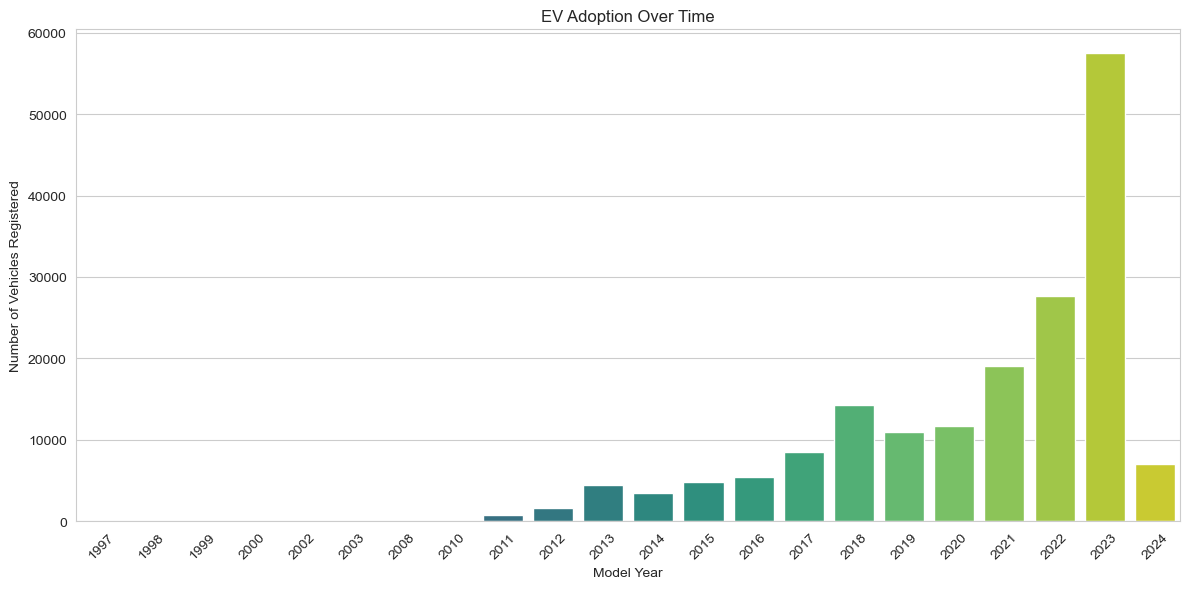

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ev=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev.index,y=ev.values,palette='viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

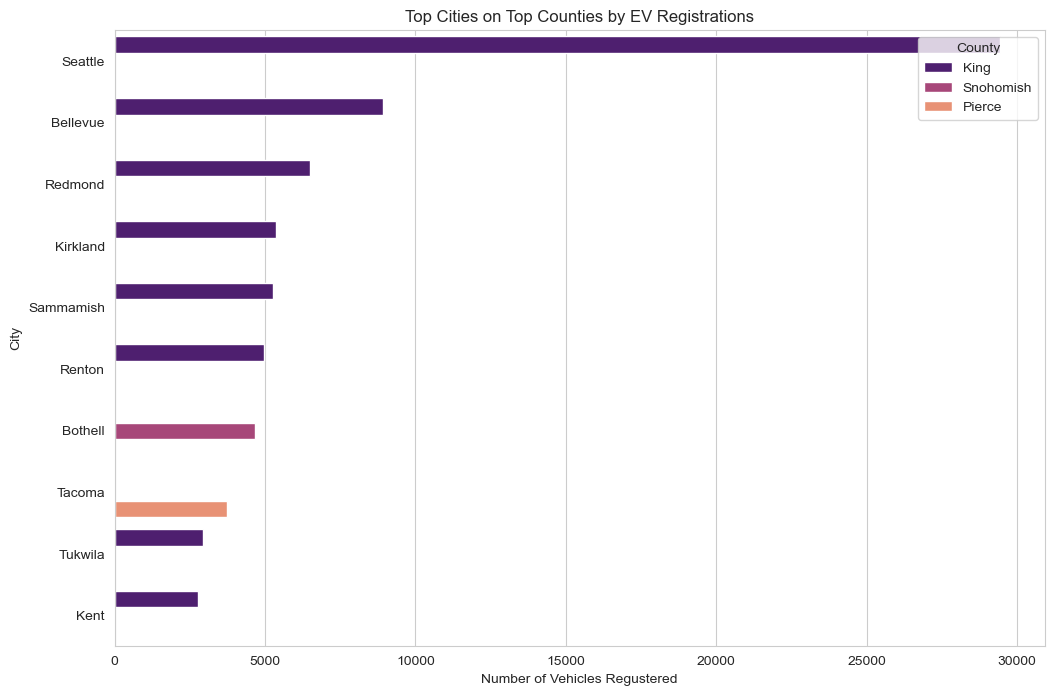

In [21]:
ev_country_distribution=ev_data['County'].value_counts()
top_countries=ev_country_distribution.head(3).index

top_countries_data=ev_data[ev_data['County'].isin(top_countries)]

ev_city_distribution_top_countries=top_countries_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
#lmao ek naya column sa ban gaya hai named->ev_city_distribution_top_countries,with index name->Number of Vehicles..thats has sorted and desc order 
top_cities=ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('Top Cities on Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Regustered')
plt.ylabel('City')
plt.legend(title='County')
plt.show()

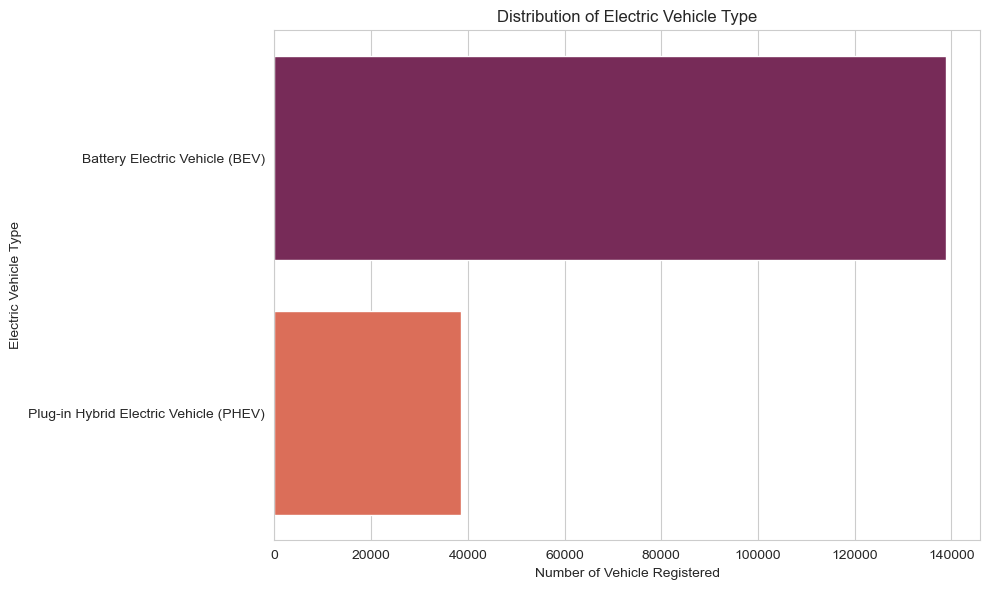

In [22]:
ev_type_distribution=ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6)),
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

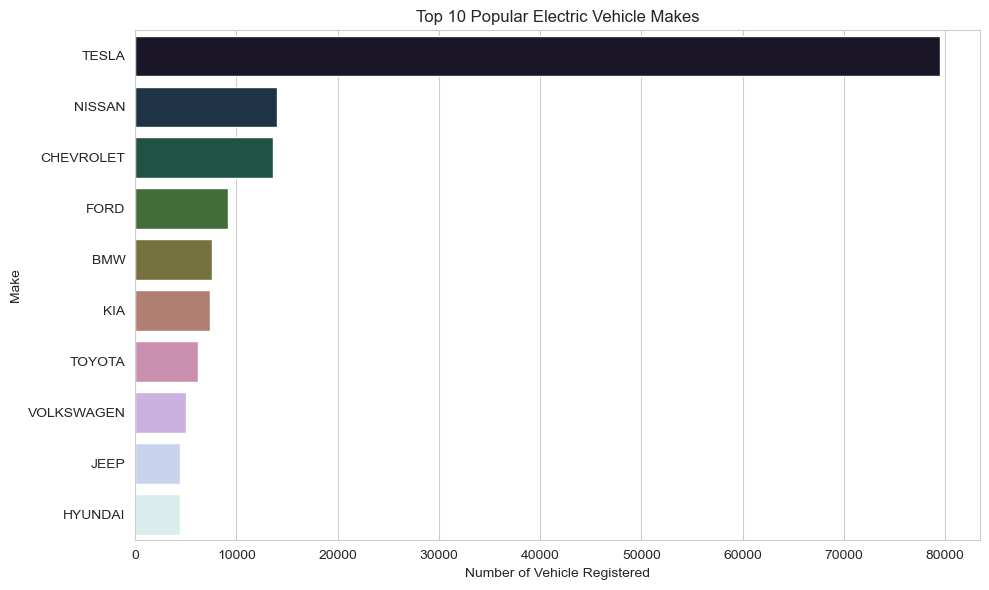

In [23]:
ev_make_distribution=ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(10,6)),
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title('Top 10 Popular Electric Vehicle Makes')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


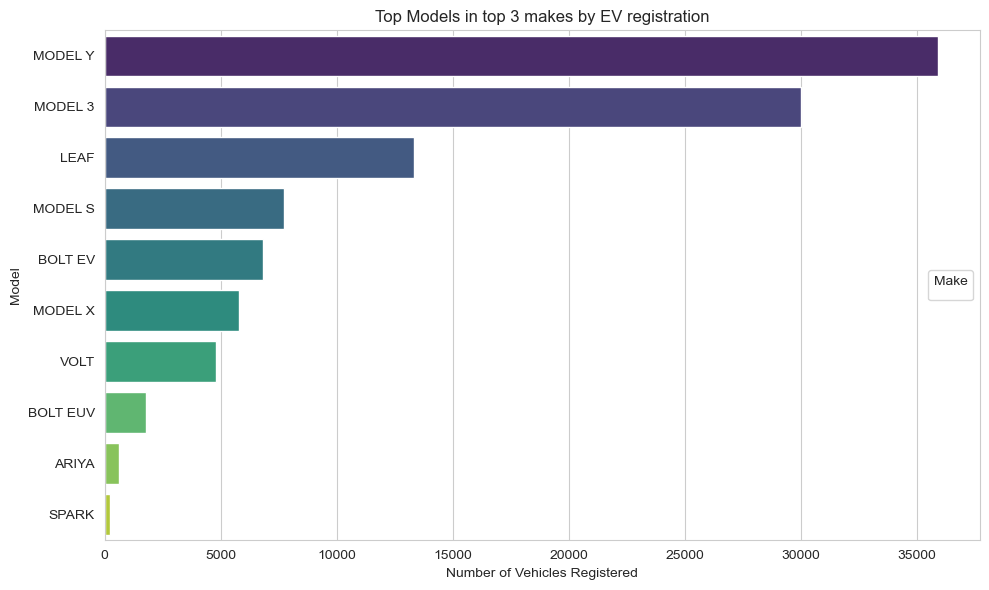

In [24]:
# selecting the top 3 manuacturers based on the number of vehicles registered
top_3_makes =ev_make_distribution.head(3).index

#filtering the dataset foe these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Analyzing the populartiy of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualizing the top 10 models across these manufacturers foe clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Number of Vehicles',y='Model' , palette="viridis",data=top_models)
plt.title('Top Models in top 3 makes by EV registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

In [25]:
# data.groupby('column name')['the column that will occur'].mean()

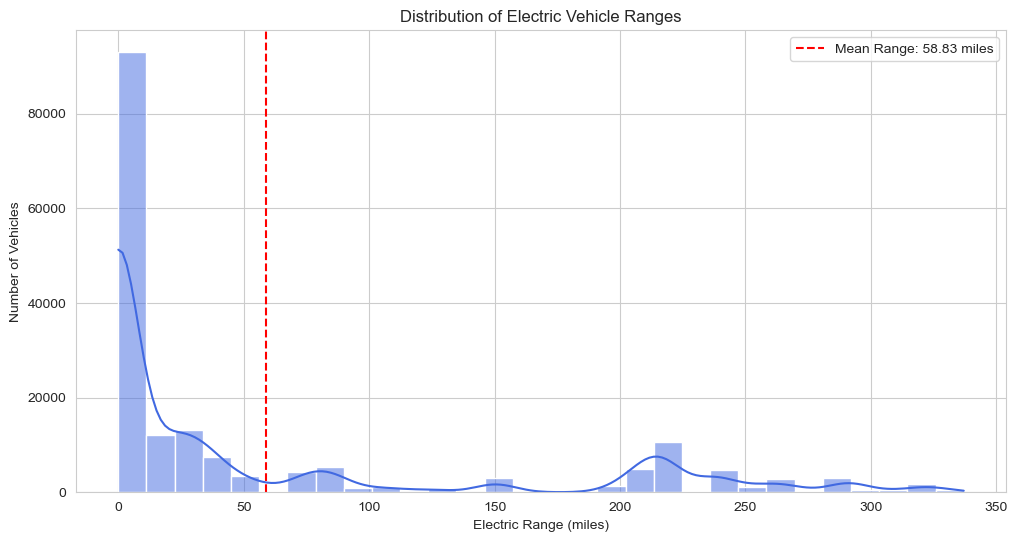

In [37]:
# analyzing teh distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')#tf is kde:Kernel Direct Estimate..continuous probablity show karne ke liye
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(),color='red',linestyle ='--',label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

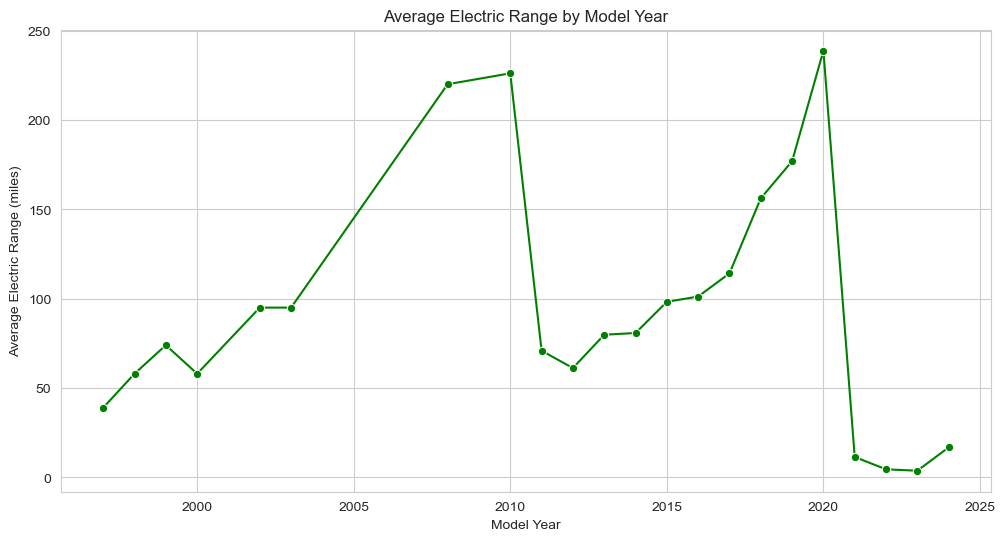

In [41]:
# calculating the averaege electric range by model year
average_range_by_year=ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=average_range_by_year,marker='o',color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()